Perusprosessissa Data Wrangling 
<br>
https://en.wikipedia.org/wiki/Data_wrangling
<br>
eli datan valmistelu (ETL putsaus jne) vie yleensä 80% työajasta. Datan valmistelu koneoppimisen malleja varten:
<br>
https://nbviewer.jupyter.org/github/taanila/tilastoapu/blob/master/datan_valmistelu.ipynb
<br>
Luokittele sen jälkeen pystyrivit (sarakkeet) joko kategorisiin tai määrällisiin. Ja esitä analytiikan osa-alueen (perinteisen neliportaisen tason) mukaisia, siis ihmismielelle mielekkäitä, kysymyksiä aineistolle:


#### Ennakoiva analytiikka: Koneoppiminen
https://tilastoapu.wordpress.com/2019/08/03/koneoppiminen-ja-scikit-learn-kirjasto/
#### Lähestyminen valitaan sen mukaan<br>1. onko jo etukäteen saatavilla ennustettavan muuttujan todellisia arvoja (label) vahvistettuina tietoina (training set eli opetusdata, supervised learning)<br>2. vai ei (unsupervised learning) ja kolmantena mahdollisuutena on<br>3. algoritmin palkitseminen tai rankaiseminen (reinforcement learning) sen suorittaessa analytiikkaa

Koneoppiminen opetusdatasta (supervised learning):
<br>
Lähestyminen valitaan sen mukaan onko ennustettavan muuttujan (target) arvot kategorisia (discrete label) vai määrällisiä (continuous label):
<br>
Kategoriselle muuttujalle luokittelumalli
<br>
Määrälliselle muuttujalle regressio-malli
<br>
Feature matrix tarkoittaa muuttujia, jotka selittävät ennustettavaa muuttujaa (target)
<br>
<font color="grey">Koneoppiminen ilman opetusdataa (unsupervised learning):
<br>
Klusterointi-malli (pyritään löytämään yhteen kuuluvat havainnot, esim. K-means)
<br>
Yksinkertaistamisen malli (core: pienin mahdollinen määrä muuttujia joka selittää riittävästi asiaa, esim. pääkomponenttianalyysi)
<br>
<i>Syvä oppiminen (deep learning) pohjautuu neuroverkkomenetelmiin, joilla pyritään myös jäljittelemään ihmisaivojenkin toimintaa</i>
</font>

SUPERVISED LEARNING (<b><font color="red">eri malleja pitää vaan työläästi kokeilla</font></b>)
<br>
<b>Luokittelumalleja kategoriselle muuttujalle</b>:
<br>
Naiivi Bayes, Logistinen regressio, Päätöspuut (decision trees). K lähintä naapuria (K nearest neighbor)
<br>
käyttötarkoituksena esim:
<br>
OCR (Optical Character Recognition) eli kuvapikseleistä esim. auton rekisterinumeron muuttaminen tekstiksi, kuvapikseleistä esineen tunnistaminen, röntgenkuvasta sairauden tunnistaminen, maksuhäiriöön ajautumisen todennäköisyys, vakuutuspetos, roskapostin suodatus jne
<br>
<br>
<b>Regressiomalleja määrälliselle muuttujalle</b> (selittävä feature matrix on määrällinen muuttuja, koska korrelaatio):
<br>
lineaarinen regressio (etsitään suora viiva joka parhaiten kulkee havaintojen kautta)
<br>
käyttötarkoituksena esim:
<br>
kysynnän ennustaminen, asunnon hinta (onko saunaa, parveketta tms), käytetyn auton hinta jne

REGRESSIO

In [1]:
#Tuodaan käytettäväksi data-analytiikan kirjasto pandas ja
#lyhennetään sitä kutsuttavaksi aliaksella pd
## https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe
import pandas as pd

#Tuodaan graafiseen esittämiseen matplotlib ja sen käyttöliittymäksi pyplot
## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html?highlight=pyplot#module-matplotlib.pyplot
import matplotlib.pyplot as plt

#Vaaditaan vanhoissa Juptter Notebook versioissa, jotta kaaviot tulostuvat
%matplotlib inline

#Katsotaan millaisia erilaisia muotoilutyylejä on saatavilla
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [2]:
#Valitaan graafinen esittäminen muotoiltavaksi tietyllä tyylillä
plt.style.use('seaborn-whitegrid')

#Tuodaan graafisen esittämisen tyylimäärittelyt erilaisilla kaaviolajeilla
#ja käytetään tätä tarvittaessa matplotlib esitysten "ylikirjoittamiseen"
#(korvaamiseen silloin kun on silmälle mukavampia vaihtoehtoja tarjolla)
import seaborn as sns

#Asetetaan näytettävien rivien rajoite (ei rajoitetta)
pd.options.display.max_rows = None
#Asetetaan näytettävien sarakkeiden rajoite (ei rajoitetta)
pd.options.display.max_columns = None


<i>Historiallisen tiedon selittävän analytiikan riippuvuuksien jatkamista tulevaisuuteen</i>
<br>
Lineaarinen regressio:
<br>
https://tilastoapu.wordpress.com/lineaarinen/
<br>
1 ennustettava määrällinen muuttuja (target)
* Kysynnän ennustaminen (target) muutettaessa <b><font color ="red">yhden</font></b> Feature matrix muuttujan arvoa

In [3]:
#DataFrame --> df
# Excel https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
df = pd.read_excel('https://taanila.fi/linreg1.xlsx')
##Jatkossa df tulkitaan oletuksena pd:n kirjaston käyttäjäksi

#Tarkistetaan lähdetiedoston metatiedoista monessako sarakkeessa on
#minkäkin verran arvoja ja mitä tyyppiä ne sisältää
df.info()

# Jos CSV https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#TARKISTA TARVITAANKO
##sepstr, default ‘,’
##usecolslist-like or callable, optional

#Pandas kirjastolla noudetaan txt-tiedostot ikään kuin ne olisivat csv-tiedostoja
##erotimerkin muoto tulee ilmaista
### sep='\s+'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kuukausi            10 non-null     int64  
 1   Mainoskulut 1000 €  10 non-null     float64
 2   Myynti 1000 €       10 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 368.0 bytes


In [4]:
#Kurkataan 5 vikaa riviä niinkuin Linuxissa ja nähdään siten rivien määrä
df.tail()
##tai 5 ekaa riviä
##df.head()

,Kuukausi,Mainoskulut 1000 €,Myynti 1000 €
5,6,0.8,82
6,7,1.0,93
7,8,0.6,75
8,9,0.9,91
9,10,1.1,105


In [5]:
#Näytetään kolme pienintä arvoa sarakkeesta 'Myynti 1000 €' 
df.nsmallest(n=3,columns='Myynti 1000 €')

,Kuukausi,Mainoskulut 1000 €,Myynti 1000 €
7,8,0.6,75
5,6,0.8,82
4,5,0.7,90


In [6]:
#Näytetään kolme suurinta arvoa sarakkeesta 'Myynti 1000 €' 
df.nlargest(n=3,columns='Myynti 1000 €')

,Kuukausi,Mainoskulut 1000 €,Myynti 1000 €
3,4,1.3,120
2,3,1.0,110
9,10,1.1,105


In [7]:
#Numeromuotoisen sarakkeen suodatus
##Noudetaan data framesta Pandas kirjaston toiminnolla ne rivt, joissa
#sarakkeen 'Myynti 1000 €' arvo on suurempi kuin 100 (suodatetaan rajoittimella > 100) 
df[ df['Myynti 1000 €'] > 100 ]
##Uloimmat hakasulut viittaavat muuttujan df "alkioon" / sarakkeeseen ja
#niiden hakasulkujen sisällä suoritetaan suodatus

,Kuukausi,Mainoskulut 1000 €,Myynti 1000 €
0,1,1.2,101
2,3,1.0,110
3,4,1.3,120
9,10,1.1,105


In [8]:
#Mahdollisten tyhjien arvojen tarkistus
df.isnull().sum()

Kuukausi              0
Mainoskulut 1000 €    0
Myynti 1000 €         0
dtype: int64

In [9]:
#Tarkistetaan onko määrällisten feature matrixiin valittavien
#selittävien muuttujien (tässä tapauksessa vain 'Mainoskulut 1000 €')
#välillä korrelaatiota määrälliseen target muuttujaan ('Myynti 1000 €''),
#jotta tulevaisuuden arvailu (ennustamisyritys) olisi mielekästä
df_temp = df.drop('Kuukausi', axis = 1)
df_temp.corr()

,Mainoskulut 1000 €,Myynti 1000 €
Mainoskulut 1000 €,1.000000,0.875442
Myynti 1000 €,0.875442,1.000000


Mitä kauempana nollasta sitä suurempi riippuvuus:
<br>
Positiivinen korrelaatio tarkoittaa sitä, että kun toinen kasvaa tai laskee, niin toinen seuraa myös perässä.
<br>
Negatiivinen eli käänteinen korrelaatio tarkoittaa sitä, että kun toinen menee yhteen suuntaan, niin toinen menee vastakkaiseen suuntan.

Korrelaatiokertoimen osalta (otoskoon ollessa vähintään 30)
<br>
alle 0,3 tulos kertoo siitä, että muuttujien välillä ei ole juurikaan suoraviivaista riippuvuutta
<br>
tulos 0,3-0,7 kertoo siitä, että muuttujien välillä on jonkin verran suoraviivaista riippuvuutta
<br>
yli 0,7 tulos kertoo siitä, että muuttujien välillä on selvä suoraviivainen riippuvuus

* Valittujen muuttujien välillä vaikuttaisi olevan selvä suoraviivainen riippuvuus

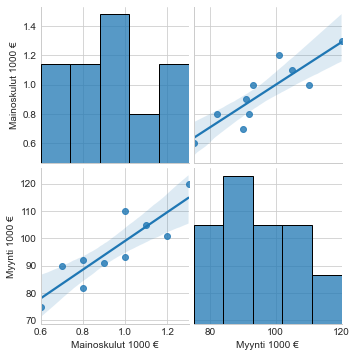

In [10]:
#Tarkastellaan muuttujien yhteyttä toisiinsa myös graafisesti
#Hajontakaaviossa trendin eli lineaarisen mallin saa mukaan
#antamalla "kind" parametrin arvoksi 'reg' 
sns.pairplot(df_temp, kind = 'reg')
#Muuttuja itsessään esitetään histogrammina

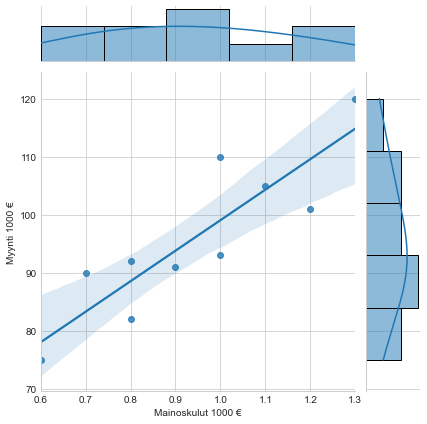

In [11]:
#Muuttujien välisen yhteyden visualisointi yhdistettynä samaan kaavioon
#Hajontakaaviossa suoraviivaisen riippuvuuden saa sen trendiviivan kuvan osalta mukaan
#(suoraviivainen ennustemalli) antamalla "kind" parametrin arvoksi 'reg' 
sns.jointplot(data=df, x='Mainoskulut 1000 €', y='Myynti 1000 €', kind = 'reg')
#Muuttuja itsessään esitetään histogrammina kaavion reunalla

Malli on sitä parempi mitä enemmän havainnot keskittyvät lähemmäksi suoraa viivaa

In [12]:
#Vakiintuneen tavan mukaan target (ennustettava muuttuja) on y
y = df['Myynti 1000 €']

#Vakiintuneen tavan mukaan feature matrix (selittävä muuttuja) on iso X
##Hetken päästä käytettävä algoritmi vaatii, että X on DataFrame
X = df['Mainoskulut 1000 €'].to_frame()

### Ennakoivan analytiikan mallin sovitus datasettiin
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

#### 1. algoritmi kokeilu (ensimmäinen sovitusyritys: Miten malli sopii toteumaan) 

In [13]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka laskee lineaarisen regression
from sklearn.linear_model import LinearRegression

#Ennustemallille annetaan parametreina:
#feature matrix (muutosta selittävät muuttujat) ja
#target (ennustettava muuttuja, joka muuttuu feature matrixin muutosten vuoksi)
malli = LinearRegression().fit(X,y)
###komennolla fit() sovitetaan malli dataan. Se on se komento, jolla konetta opetetaan

In [14]:
#Suoraviivaisen mallin trendiviivan/regressiosuoran kulmakerroin
malli.coef_
#Kulmakerroin tarkoittaa feature matrixin (X) muutoksen aiheuttavan
#kulmakertoimen verran muutosta targetin (y) osalta
##Tätä voisi ehkä kokeilla hintajouston (price elasticity) optimointiin

array([52.56756757])

In [15]:
#Suoraviivaisen mallin vakiotermi
malli.intercept_
##Vakiotermi antaa targetille arvon feature matrixin ollessa nolla

46.486486486486505

In [16]:
#Ennustemallin selityskerroin arvioi kuinka monta prosenttia targetin vaihtelusta
#voidaan selittää feature matrixilla
#(kuinka merkittäviä kokeiltavat selittävät muuttujat ovat)
malli.score(X,y)

0.7663982928521625

In [17]:
#Ennustusta targetille voidaan kokeilla feature matrixin eri arvoilla
malli.predict(pd.DataFrame([0.7, 0.8, 0.9]))
##Esim. jos mainostetaan 800e, niin tämän "import LinearRegression" malli
##ennakoi myynnin olevan 88.540e

array([83.28378378, 88.54054054, 93.7972973 ])

<i>Historiallisen tiedon selittävän analytiikan riippuvuuksien jatkamista tulevaisuuteen</i>
<br>
Lineaarinen regressio:
<br>
https://tilastoapu.wordpress.com/lineaarinen/
<br>
1 ennustettava määrällinen muuttuja (target)
* Kysynnän ennustaminen (target) muutettaessa <b><font color ="red">enemmän kuin yhden</font></b> Feature matrix muuttujan arvoa
<br>

ESIMERKKI 1/2

In [18]:
df_2 = pd.read_excel('http://taanila.fi/mokki.xlsx')
df_2

,nro,ranta,pinta-ala,sähkö,hinta
0,1,30,50,0,95
1,2,35,42,0,95
2,3,40,25,1,80
3,4,50,30,1,100
4,5,55,45,0,135
5,6,60,24,1,100
6,7,60,60,1,210
7,8,70,34,1,160
8,9,80,32,0,150
9,10,85,28,0,150


In [19]:
#Mahdollisten tyhjien arvojen tarkistus
df_2.isnull().sum()

nro          0
ranta        0
pinta-ala    0
sähkö        0
hinta        0
dtype: int64

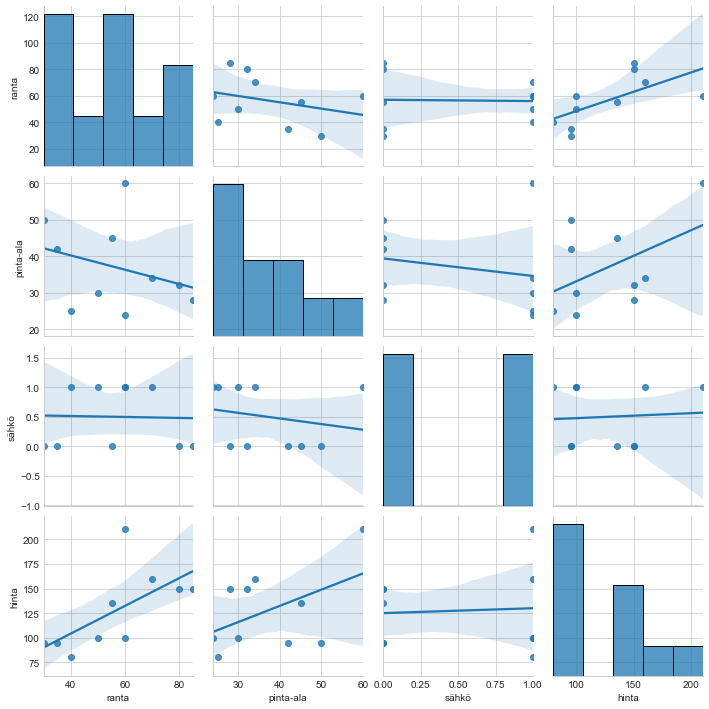

In [20]:
df_temp2 = df_2.drop('nro', axis = 1)

#Tarkastellaan useampien muuttujien (feature matrix) yhteyttä kerrallaan
#targettiin (hinta) graafisesti
#Hajontakaaviossa trendin eli lineaarisen mallin saa mukaan
#antamalla "kind" parametrin arvoksi 'reg' 
sns.pairplot(df_temp2, kind='reg')
#Muuttuja itsessään esitetään histogrammina

Malli on sitä parempi mitä enemmän havainnot keskittyvät lähemmäksi suoraa viivaa.
<br>
Yllä olevan kaavion alinta riviä tarkastellessa vaikuttaa silmämääräisesti siltä, että havainnot keskittyvät korrelaation lineaarisen suoranviivan riippuvuuden osalta lähimmäksi "trendiviivaa" rannan ja hinnan välisessä yhteydessä 

In [21]:
#Tarkistetaan onko määrällisten feature matrixiin valittavien
#selittävien muuttujien välillä korrelaatiota määrälliseen target muuttujaan
#(hinta), jotta tulevaisuuden arvailu (ennustamisyritys) olisi mielekästä
korrelaatio_matriisi = df_temp2.corr().round(2)
##'.round(2)' on pyöristys kahteen desimaaliin
korrelaatio_matriisi

,ranta,pinta-ala,sähkö,hinta
ranta,1.00,-0.31,-0.03,0.64
pinta-ala,-0.31,1.00,-0.21,0.48
sähkö,-0.03,-0.21,1.00,0.06
hinta,0.64,0.48,0.06,1.00


Mitä kauempana nollasta sitä suurempi riippuvuus:
<br>
Positiivinen korrelaatio tarkoittaa sitä, että kun toinen kasvaa tai laskee, niin toinen seuraa myös perässä.
<br>
Negatiivinen eli käänteinen korrelaatio tarkoittaa sitä, että kun toinen menee yhteen suuntaan, niin toinen menee vastakkaiseen suuntan.

Korrelaatiokertoimen osalta (otoskoon ollessa vähintään 30)
<br>
alle 0,3 tulos kertoo siitä, että muuttujien välillä ei ole juurikaan suoraviivaista riippuvuutta
<br>
tulos 0,3-0,7 kertoo siitä, että muuttujien välillä on jonkin verran suoraviivaista riippuvuutta
<br>
yli 0,7 tulos kertoo siitä, että muuttujien välillä on selvä suoraviivainen riippuvuus

* Tarkasteltavien feature matrix muuttujien osalta vaikuttaisi rannalla olevan jonkin verran suoraviivaista riippuvuutta targettiin (hinta)

<AxesSubplot:>

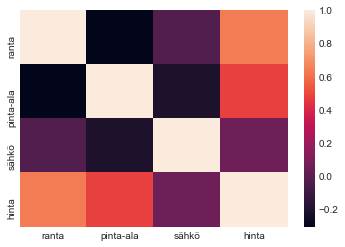

In [22]:
#Yllä olevan taulukon eri solujen värjäys
sns.heatmap(korrelaatio_matriisi)

<AxesSubplot:>

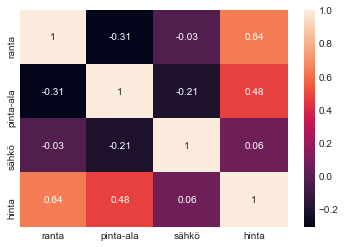

In [23]:
#Lisäämällä HeatMap:piin "annot = True" lisätään värjättyihin soluihin
#ne arvot, joiden perusteella väritys on suoritettu
sns.heatmap(data=korrelaatio_matriisi, annot=True)

Mitä kauempana nollasta sitä suurempi riippuvuus:
<br>
Positiivinen korrelaatio tarkoittaa sitä, että kun toinen kasvaa tai laskee, niin toinen seuraa myös perässä.
<br>
Negatiivinen eli käänteinen korrelaatio tarkoittaa sitä, että kun toinen menee yhteen suuntaan, niin toinen menee vastakkaiseen suuntan.

Korrelaatiokertoimen osalta (otoskoon ollessa vähintään 30)
<br>
alle 0,3 tulos kertoo siitä, että muuttujien välillä ei ole juurikaan suoraviivaista riippuvuutta
<br>
tulos 0,3-0,7 kertoo siitä, että muuttujien välillä on jonkin verran suoraviivaista riippuvuutta
<br>
yli 0,7 tulos kertoo siitä, että muuttujien välillä on selvä suoraviivainen riippuvuus

Tarkasteltavien feature matrix muuttujien osalta vaikuttaisi sähkö olevan ennustemallista pois jätettävä määrällinen muuttuja
<br>
<br>
<b><font color="red">Valitettavasti eri malleja pitää vaan työläästi kokeilla</font></b> eli käytettävissä olevassa datasetissä myös ilman korrelaatiota olevatkin määrälliset feature matrixin muuttujat voivat joissain tilanteissa olla osana tuottamassa paremmin todellista elämää vastaavaa ennustemallia 

In [24]:
#Vakiintuneen tavan mukaan target (ennustettava muuttuja) on y
y_2 = df_2['hinta']

#Vakiintuneen tavan mukaan feature matrix (selittävä muuttuja) on iso X
##Hetken päästä käytettävä algoritmi vaatii, että X on DataFrame
X_2 = df_2[['ranta', 'pinta-ala', 'sähkö']]

### Ennakoivan analytiikan mallin sovitus datasettiin
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

#### 1. algoritmi kokeilu (ensimmäinen sovitusyritys: Miten malli sopii toteumaan) 

In [25]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka laskee lineaarisen regression
from sklearn.linear_model import LinearRegression

#Ennustemallille annetaan parametreina:
#feature matrix (muutosta selittävät muuttujat) ja
#target (ennustettava muuttuja, joka muuttuu feature matrixin muutosten vuoksi)
malli_2 = LinearRegression().fit(X_2,y_2)
###komennolla fit() sovitetaan malli dataan. Se on se komento, jolla konetta opetetaan

In [26]:
#Suoraviivaisen mallin trendiviivan/regressiosuoran kulmakerroin
malli_2.coef_
#Kulmakerroin tarkoittaa feature matrixin (X) muutoksen aiheuttavan
#kulmakertoimen verran muutosta targetin (y) osalta

array([ 1.9750098 ,  2.77578415, 20.29877373])

Rantaviivan pituus otetaan mukaan ennustemalliin kertoimella 1,975
<br>
Pinta-ala otetaan mukaan ennustemalliin kertoimella 2,775
<br>
<font color ="red">Sähkö otetaan mukaan ennustemalliin kertoimella 20,298(!?!)</font>

In [27]:
#Suoraviivaisen mallin vakiotermi
malli_2.intercept_
##Vakiotermi antaa targetille arvon feature matrixin ollessa nolla

-96.94145434036429

Rantaviivan pituus * 1,975
<br>
+
<br>
Pinta-ala * 2,775
<br>
+
<br>
Sähköliittymä * 20,298
<br>
 -- Vakiotermi 96.941
<br>
= Target (hinta) ilman yllä olevia feature matrix muuttujien vaikutusta

In [28]:
#Ennustemallin selityskerroin arvioi kuinka monta prosenttia targetin vaihtelusta
#voidaan selittää feature matrixilla
#(kuinka merkittäviä kokeiltavat selittävät muuttujat ovat targetin muodostuksessa)
malli_2.score(X_2,y_2)

0.9819136190845802

#### 1. algoritmin soveltuvuuden arviointi (1/3): Onko ennustusvirheen perusteena sattumanvaraisuus, "residual"

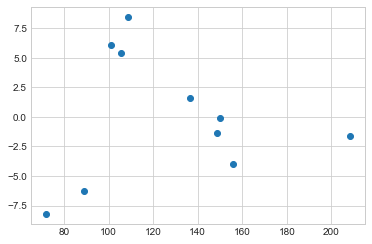

In [29]:
#Tarkastellaan miten ennuste osuu toteumaan plotaten graafisena visualisointina
#miten juuri luotu ennustemalli olisi ennustanut koulutusdatan targetin ja
#vähennetään siitä varsinainen koulutusdata eli toteuma, jolloin jäljelle
#jää ennustevirhe
plt.scatter(malli_2.predict(X_2), malli_2.predict(X_2)-y_2)

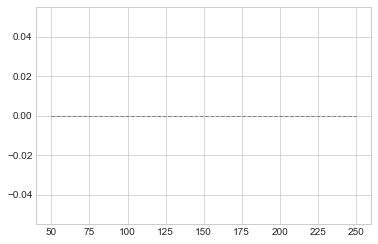

In [30]:
#Lisätään keskikohtaan (nollatasolle) katkoviiva helpottamaan intuitiivista omaksumista
##plt.axhline(y=0, color = 'gray', linewidth = 1, linestyle = '--')
plt.hlines(y=0,xmin=50,xmax=250,color = 'gray', linewidth = 1, linestyle = '--')

Text(0, 0.5, 'Poikkeama todellisesta')

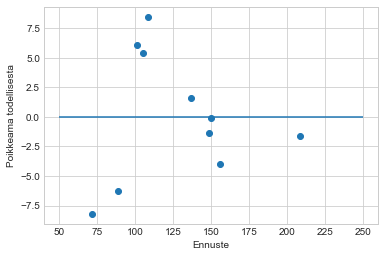

In [31]:
plt.scatter(malli_2.predict(X_2), malli_2.predict(X_2)-y_2)
#Lisätään keskikohtaan (nollatasolle) katkoviiva helpottamaan intuitiivista omaksumista
plt.hlines(y=0,xmin=50,xmax=250)

#Akselien nimeäminen
plt.xlabel('Ennuste')
plt.ylabel('Poikkeama todellisesta')

Yllä olevassa kaaviossa on havaittavissa, että ennuste voi mennä pieleen molempiin suuntiin.
<br><br>
Mikäli ennustevirhe graafisen visualisoinnin muodossa vaikuttaa silmämääräisesti toistuvan samankaltaisena (ilmenee säännönmukaisuutta), kertoo se siitä, että ennustamisessa on jätetty jotain oleellista huomioimatta. Sama asia toisin sanoin sanottuna olisi, että feature matrixiin on unohdettu laittaa jokin määrällinen muuttuja, jolla on suoraviivainen korrelaatiovaikutus targettiin.
<br><br>
Käytännössä kuitenkin kannattaa kokeilla muitakin algoritmejä, jos jokin toinen malli sopisi paremmin datasettiin

#### 1. algoritmin soveltuvuuden arviointi (2/3): Miten ennuste osuu toteumaan

Text(0, 0.5, 'Ennuste')

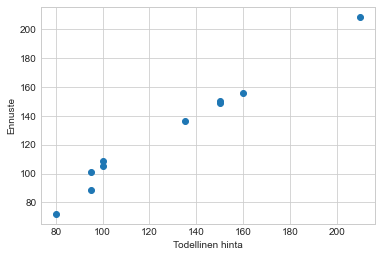

In [32]:
#Plotataan graafisena visualisointina miten juuri luotu ennustemalli
#olisi ennustanut koulutusdatan targetin.
#Mitä enemmän hajontakaavion pisteet seuraavat suoraa viivaa vasemmasta alakulmasta
#oikeaan yläkulmaan, sitä parempi ennustemalli on
plt.scatter(y_2, malli_2.predict(X_2))

#Akselien nimeäminen
plt.xlabel('Todellinen hinta')
plt.ylabel('Ennuste')

Mikäli malli ei vaikuta onnistuneelta voidaan havaintojen asettautumista suoralle linjalle koettaa edesauttaa vaihtelemalla feature matrixin määrällisiä muuttujia (tai kokeilemalla muita algoritmejä)

In [33]:
#Uusi datasetti, jota algoritmi ei ole nähnyt koulutusvaiheessa
#ja jossa ei ole hintoja tiedossa
X_2_uudet = pd.read_excel('http://taanila.fi/mokkinew.xlsx')

X_2_uudet

,ranta,pinta-ala,sähkö
0,100,90,1
1,60,56,1
2,30,25,0
3,50,30,0


In [34]:
#Lasketaan ennuste uudelle datasetille
X_2_uudet['Hintaennuste'] = malli_2.predict(X_2_uudet)
X_2_uudet

,ranta,pinta-ala,sähkö,Hintaennuste
0,100,90,1,370.678873
1,60,56,1,197.301820
2,30,25,0,31.703444
3,50,30,0,85.082560


#### 1. algoritmin soveltuvuuden arviointi (3/3): Perinteisen regressiomallin (ei-lineaarinen regressio) vakiokuvaukset datalle

In [35]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka laskee ei-lineaarisen regression
import statsmodels.api as sm
##statsmodels kirjasto ei ota luotavaan malliin mukaan vakiotermiä 

#Feature matrixiin vakiotermin lisäys
X_3 = sm.add_constant(X_2)
##Vakiotermi antaa targetille arvon feature matrixin ollessa nolla

#Vakiintuneen tavan mukaan target (ennustettava muuttuja) on y
y_3 = y_2

#Ennustemallille annetaan parametreina:
#feature matrix (muutosta selittävät muuttujat) ja
#target (ennustettava muuttuja, joka muuttuu feature matrixin muutosten vuoksi)
malli_3_sm = sm.OLS(y_3, X_3).fit()
##ennustemalli lasketaan statsmodels kirjaston OLS-toiminnolla 
##komennolla fit() sovitetaan malli dataan. Se on se komento, jolla konetta opetetaan

print(malli_3_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  hinta   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     108.6
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           1.29e-05
Time:                        21:23:13   Log-Likelihood:                -30.630
No. Observations:                  10   AIC:                             69.26
Df Residuals:                       6   BIC:                             70.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -96.9415     12.767     -7.593      0.0

C:\Users\Administrator\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


P-arvo kertoo millä todennäköisyydellä riippuvuus on pelkkää sattumaa tai seurausta otantavirheestä. Alle 0,05 tulos kertoo merkitsevästä riippuvuudesta.
<br><br>
Targetin (Dep. Variable: hinta) ja feature matrixin 'sähkö' p-arvo on yllättäen reilusti alle 0,05.
* Tässä tapauksessa <b>riippuvuus on merkitsevä, koska pearsonr -testin p-arvo on alle 0,05</b>.
<br>

T-testi testaa vertailtavien muuttujien keskiarvoja.

<b><font color="red">Valitettavasti eri malleja pitää vaan työläästi kokeilla</font></b> eli käytettävissä olevassa datasetissä myös ilman korrelaatiota olevatkin määrälliset feature matrixin muuttujat voivat joissain tilanteissa olla osana tuottamassa paremmin todellista elämää vastaavaa ennustemallia 

<i>Historiallisen tiedon selittävän analytiikan riippuvuuksien jatkamista tulevaisuuteen</i>
<br>
Lineaarinen regressio:
<br>
https://tilastoapu.wordpress.com/lineaarinen/
<br>
1 ennustettava määrällinen muuttuja (target)
* Kysynnän ennustaminen (target) muutettaessa <b><font color ="red">enemmän kuin yhden</font></b> Feature matrix muuttujan arvoa
<br>

ESIMERKKI 2/2

In [36]:
#Opetustarkoitukseen tarkoitetun aineiston noutaminen netistä
#(esimerkkidataa Bostonin asuntojen hinnoista)
from sklearn.datasets import load_boston
boston_data = load_boston()

#Dataan on valmiiksi muodostettu avain-arvo-pareja
boston_data.keys()
##target = target
##data = feature matrix (kaikki mahdolliset selittävät muuttujat)
##feature_names = selittävien muuttujien nimet
##DESCR = Opetustarkoitukseen tarkoitetun aineiston kuvaus
##filename = tiedoston nimi

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [37]:
print(boston_data.DESCR)
#"Median value of owner-occupied homes in $1000's" is usually the target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [38]:
#DataFramen muodostus, johon sijoitetaan
##data = feature matrix (kaikki mahdolliset selittävät muuttujat)
##feature_names = selittävien muuttujien nimet
df_3 = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

#DataFrameen sarakkeen lisäys
##target = target
###"Median value of owner-occupied homes in $1000's" is usually the target
df_3['MEDV'] = boston_data.target


#Tuodaan käytettäväksi moniulotteisen datan käsittelyyn soveltuva kirjasto,
#joka sisältää mm. logaritmin, ja
#lyhennetään sitä kutsuttavaksi aliaksella
import numpy as np
# https://www.w3schools.com/python/numpy/numpy_intro.asp
#Logaritmimuunnos hajontakaavion kaarevan käyrän
#oikaisemisen yritykseksi (trendiviivan mukaiseksi)
df_3['LSTAT2'] = np.log(df_3['LSTAT'])


#Kurkataan 7 vikaa riviä niinkuin Linuxissa ja nähdään siten rivien määrä
df_3.tail(7)
##tai 5 ekaa riviä
##df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LSTAT2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5,2.714695
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8,2.662355
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,2.269028
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,2.206074
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1.729884
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1.868721
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9,2.064328


In [39]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
 14  LSTAT2   506 non-null    float64
dtypes: float64(15)
memory usage: 59.4 KB


In [40]:
#Mahdollisten tyhjien arvojen tarkistus
df_3.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
LSTAT2     0
dtype: int64

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

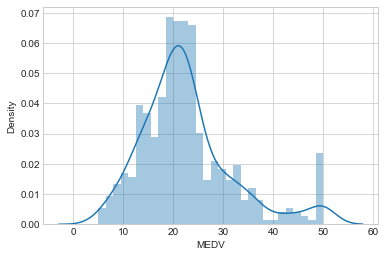

In [41]:
#Määrällinen muuttuja voidaan esittää luokiteltuna jakaumana
##parametrilla 'bins' kerrotaan moneenko kateroriaan jaetaan
sns.distplot(df_3['MEDV'], bins=30)

Yllä oleva jakauma vaikuttaa symmetriseltä lukuunottamatta poikkeamaa yläpäässä

In [42]:
#Tarkistetaan onko määrällisten feature matrixiin valittavien
#selittävien muuttujien välillä korrelaatiota määrälliseen target muuttujaan
#(hinta), jotta tulevaisuuden arvailu (ennustamisyritys) olisi mielekästä
korrelaatio_matriisi_2 = df_3.corr().round(2)
##'.round(2)' on pyöristys kahteen desimaaliin
korrelaatio_matriisi_2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LSTAT2
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39,0.40
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36,-0.48
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18,-0.07
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43,0.58
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70,-0.66
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38,0.61
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25,-0.48
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38,0.46
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47,0.52


<AxesSubplot:>

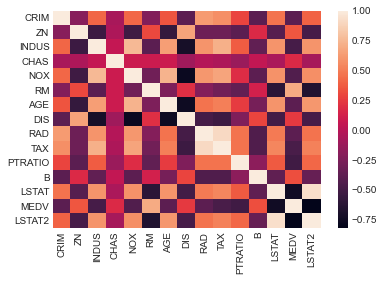

In [43]:
#Yllä olevan taulukon eri solujen värjäys
sns.heatmap(korrelaatio_matriisi_2)

<AxesSubplot:>

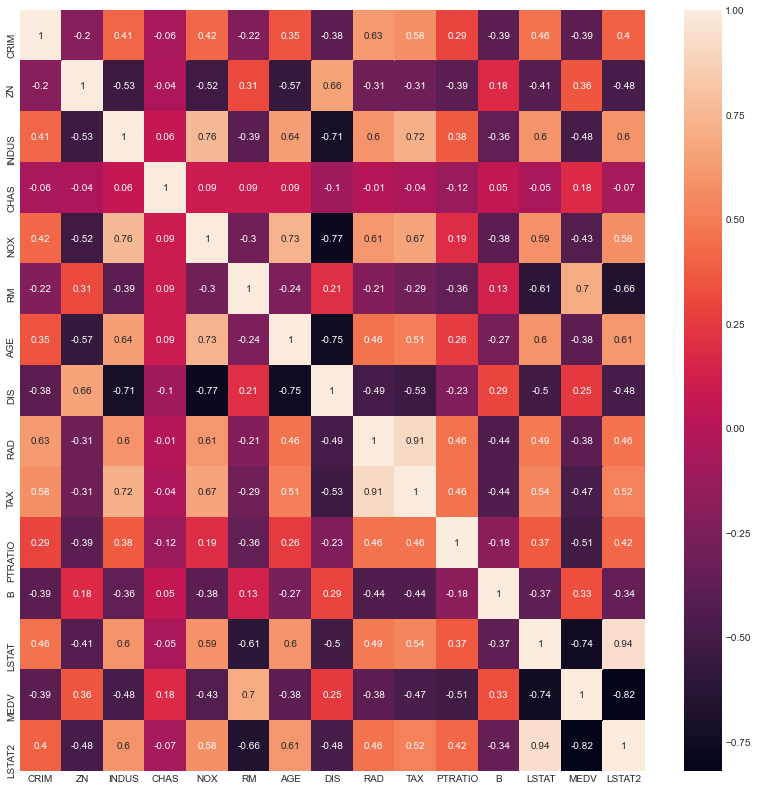

In [44]:
#Plotataan graafisena visualisointina suurentamalla
#"figsize" esitysaluetta oletuskoostaan suuremmaksi
plt.figure(figsize=(14, 14))

#Lisäämällä HeatMap:piin "annot = True" lisätään värjättyihin soluihin
#ne arvot, joiden perusteella väritys on suoritettu
sns.heatmap(data=korrelaatio_matriisi_2, annot=True)
##Target on alimmalla rivillä

Mitä kauempana nollasta sitä suurempi riippuvuus:
<br>
Positiivinen korrelaatio tarkoittaa sitä, että kun toinen kasvaa tai laskee, niin toinen seuraa myös perässä.
<br>
Negatiivinen eli käänteinen korrelaatio tarkoittaa sitä, että kun toinen menee yhteen suuntaan, niin toinen menee vastakkaiseen suuntan.

Korrelaatiokertoimen osalta (otoskoon ollessa vähintään 30)
<br>
alle 0,3 tulos kertoo siitä, että muuttujien välillä ei ole juurikaan suoraviivaista riippuvuutta
<br>
tulos 0,3-0,7 kertoo siitä, että muuttujien välillä on jonkin verran suoraviivaista riippuvuutta
<br>
yli 0,7 tulos kertoo siitä, että muuttujien välillä on selvä suoraviivainen riippuvuus

HUOM! LSTAT-muuttuja muunnettuna logaritmilla muuttujaksi LSTAT2 omaa suuremman korrelaatiokertoimen kuin alkuperäinen LSTAT

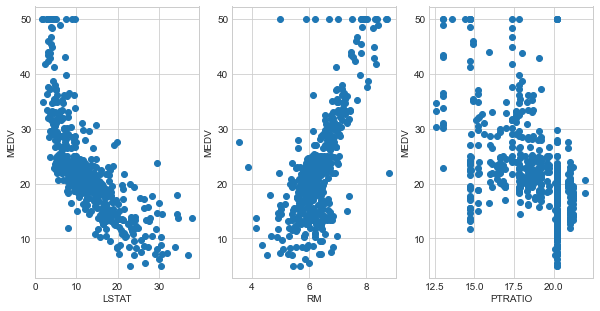

In [45]:
#feature matrixiin valitaan suurimmat korrelaatiot
#features = ['LSTAT2', 'RM', 'PTRATIO']
features = ['LSTAT', 'RM', 'PTRATIO']
target = df_3['MEDV']

#Tarkastellaan muuttujien yhteyttä toisiinsa plotaten
#korrelaatio myös graafisesti hajontakaavioon
plt.figure(figsize=(10, 5))

#Feature matrixin läpikäynti ja useamman muuttujan plottaaminen
##Toiminto 'enumerate' palauttaa feature matrixin muuttujan nimitiedon
#(joka asetetaan x-labeliin) ja järjestysnumeron indeksiin jatkokäsiteltäväksi
for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)#Kaavio 1 riville, len palauttaa featureiden määrän
    plt.scatter(df_3[feature], target)
    plt.xlabel(feature)
    plt.ylabel('MEDV')

Yllä olevassa hajontakaaviossa vaikuttaa feature matrixin määrällisen muuttujan ja targetin 'MEDV' välille olevan graafisesti esitettynä  pyrkimys muodostua visuaalisesti
* vasemmalle käyrä kaari
* keskelle suora viiva
* oikealle elokuvan matrix vesiputous (visualisoituna häilyvä yhteys vasemmasta yläkulmasta oikeaan alakulmaan)

Datan valmistelua (Data Wrangling) sen jakamiseksi koulutusdataan ja testidataan

In [46]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka jakaa datan
from sklearn.model_selection import train_test_split

#Vakiintuneen tavan mukaan target (ennustettava muuttuja) on y
y_4 = target
#Vakiintuneen tavan mukaan feature matrix (selittävä muuttuja) on iso X
X_4 = df_3[features]

#random_state arvo määrittelee miten data erotellaan opetus- ja testidataan
##eri kokeilukerroilla tulee käyttää samaa arvoa (arvolla itsellään ei ole mitään merkitystä)
##sillä jos aineisto on jaettu eri tavalla osiin voi päätyä hyvinkin erilaiseen malliin
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size = 0.2, random_state=5)

#KAtsotaan millaisiin paloihin jako tapahtui
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


### Ennakoivan analytiikan mallin sovitus datasettiin
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

In [47]:
#Ennustemallille annetaan parametreina:
#feature matrix (muutosta selittävät muuttujat) ja
#target (ennustettava muuttuja, joka muuttuu feature matrixin muutosten vuoksi)
malli_4 = LinearRegression().fit(X_train, y_train)
###komennolla fit() sovitetaan malli dataan. Se on se komento, jolla konetta opetetaan

malli_4

LinearRegression()

In [48]:
#Suoraviivaisen mallin trendiviivan/regressiosuoran kulmakerroin
malli_4.coef_
#Kulmakerroin tarkoittaa feature matrixin (X) muutoksen aiheuttavan
#kulmakertoimen verran muutosta targetin (y) osalta

array([-0.64697098,  3.9169303 , -0.95483295])

In [49]:
#Suoraviivaisen mallin vakiotermi
malli_4.intercept_
##Vakiotermi antaa targetille arvon feature matrixin ollessa nolla

23.681070268714848

#### 1. algoritmin soveltuvuuden arviointi (1/2): Kuinka paljon keskimäärin ennuste on epäkelpo

(ESIMERKKI 2/2, <b><font color ="red">enemmän kuin yksi</font></b> Feature matrix muuttuja)

In [50]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka laskee ennustevirheiden itseisarvojen
##keskiarvon (käytännössä poistaa miinusmerkit ennustevirheistä)
from sklearn.metrics import mean_absolute_error

#Vakiintuneen tavan mukaan target (ennustettava muuttuja) on y
#Vakiintuneen tavan mukaan feature matrix (selittävä muuttuja) on iso X
#Malli-olion predict-toiminnolla voidaan laskea ennusteet
##Opetusdatan "train" antamat ennusteet "X_train" feature matrixilla 
y_train_predict = malli_4.predict(X_train)
##print(X_train.shape)
##(404, 2)
###datasetissä on 404 riviä ja testidataan jäi 102
###print(X_test.shape)
###(102, 2)

#Keskimääräinen ennustevirhe targetille, jossa lähtötietona on toteumat
#opetusdatasta "y_train" ja niitä verrataan opetusdatasta muodostettuihin 
#ennusteisiin "y_train_predict"
mae = (mean_absolute_error(y_train, y_train_predict))
##"mean absolute error" kertoo siis montako prosenttia ennusteista epäonnistuu

#Ennustemallin selityskerroin arvioi kuinka monta prosenttia targetin vaihtelusta
#voidaan selittää feature matrixilla
#(kuinka merkittäviä kokeiltavat selittävät muuttujat ovat)
r2 = malli_4.score(X_train, y_train)

print('Mallin sopivuus OPETUSDATAAN')
print("--------------------------------------")
print('Keskimääräinen virhe: {}'.format(mae))
print('Selityskerroin: {}'.format(r2))
print("\n")

#####################################################################################


#Toistetaan yllä oleva opetusdatan lisäksi myös testidatalle, jota
#algoritmi ei ole nähnyt koulutusvaiheessa
y_test_predict = malli_4.predict(X_test)
mae = (mean_absolute_error(y_test, y_test_predict))
r2 = malli_4.score(X_test, y_test)

print('Mallin sopivuus TESTIDATAAN')
print('--------------------------------------')
print('Keskimääräinen virhe: {}'.format(mae))
print('Selityskerroin: {}'.format(r2))

Mallin sopivuus OPETUSDATAAN
--------------------------------------
Keskimääräinen virhe: 3.69817186489697
Selityskerroin: 0.6725214335656511


Mallin sopivuus TESTIDATAAN
--------------------------------------
Keskimääräinen virhe: 3.6914772094857233
Selityskerroin: 0.6915878280744173


Mikäli algoritmin suorittaman ennustustoiminnon jälkeen testidatalle saadaan suurempi keskimääräinen virhe ja pienempi selityskerroin kuin opetusdatalle, niin viittaa se siihen, että testidataa on ylimallinnettu pois yleispätevästä (eli otettu mukaan liikaa muuttujia tai muuta turhaa käsittelyä, joka on kohdedata specifiä ilman yleispätevyyttä)



Kahdella selittävällä määrällisellä muuttujalla ('LSTAT' ja 'RM')
<br>
Mallin sopivuus OPETUSDATAAN
<br>
Keskimääräinen virhe: 4.031115615178024
<br>
Selityskerroin: 0.6300745149331701
<br>
Mallin sopivuus TESTIDATAAN
<br>
Keskimääräinen virhe: 3.7913102133431047
<br>
Selityskerroin: 0.6628996975186953
<br>
<br>
Kolmella selittävällä määrällisellä muuttujalla ('LSTAT', 'RM' ja 'PTRATIO')
<br>
Mallin sopivuus OPETUSDATAAN
<br>
Keskimääräinen virhe: 3.69817186489697
<br>
Selityskerroin: 0.6725214335656511
<br>
Mallin sopivuus TESTIDATAAN
<br>
Keskimääräinen virhe: 3.6914772094857233
<br>
Selityskerroin: 0.6915878280744173
<br>
<br>
Kolmella selittävällä määrällisellä muuttujalla ja logaritmuunnoksella oikaistulla käyrällä ('LSTAT2', 'RM' ja 'PTRATIO')
<br>
Mallin sopivuus OPETUSDATAAN
<br>
Keskimääräinen virhe: 3.4661238175277758
<br>
Selityskerroin: 0.7269572646730218
<br>
Mallin sopivuus TESTIDATAAN
<br>
Keskimääräinen virhe: 3.3941242922975428
<br>
Selityskerroin: 0.753237887010362

#### 1. algoritmin soveltuvuuden arviointi (2/2): Testidatan tiedossa olevien toteumien vertaaminen ennustemallin antamiin laskelmiin

(ESIMERKKI 2/2, <b><font color ="red">enemmän kuin yksi</font></b> Feature matrix muuttuja)

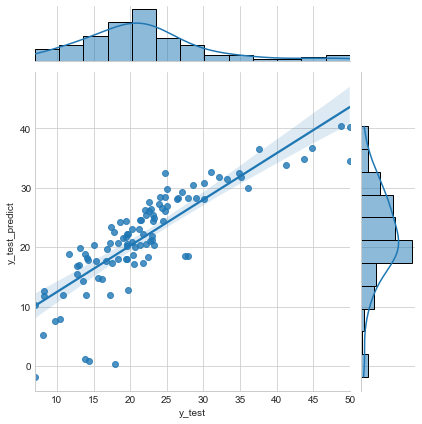

In [51]:
#DataFramen luominen
test = pd.DataFrame()

#Vakiintuneen tavan mukaan target (ennustettava muuttuja) on y
#DataFrameen sarakkeen lisääminen ja sinne arvojen sijoittaminen
test['y_test'] = y_test
#DataFrameen sarakkeen lisääminen ja sinne arvojen sijoittaminen
test['y_test_predict'] = y_test_predict

#Muuttujien välisen yhteyden visualisointi yhdistettynä samaan kaavioon
#Hajontakaaviossa suoraviivaisen riippuvuuden saa sen trendiviivan kuvan osalta mukaan
#(suoraviivainen ennustemalli) antamalla "kind" parametrin arvoksi 'reg' 
sns.jointplot(data=test, x='y_test',y='y_test_predict',kind='reg')
#Muuttuja itsessään esitetään histogrammina kaavion reunalla

Malli on sitä parempi mitä enemmän hajontakaavion havaintopisteet keskittyvät lähemmäksi korrelaation lineaarisen suoranviivan riippuvuuden osalta lähimmäksi "trendiviivaa"

Yllä olevassa kuviossa on havaintopisteiden osalta nähtävissä lievää kaarevuuden muodostumista täysin suoran viivan sijaan myös kolmannen muuttujan mukaan ottamisen jälkeen. Sen lisäksi kaarikaan ei muodostu täysin yhteneväisesti vaan pisteet vaikuttavat olevan vähän hajallaan, sinne tänne hujan hajan

Käyräviivaista (kaarevaa) riippuvuutta voi koettaa suoraviivaistaa ottamalla määrällisestä muuttujasta logaritmin

# Tehty: Kolmannen muuttujan lisääminen feature matrixiin

# Tehty: Hajontakaaviossa suoraviivaisen riippuvuuden trendiviivan ympärille keskittyvien havaintojen kaarevan käyrän viivan oikaisemisen yritys 

Tekemättä: MEDV muuttujaan liittyvä anomalia (poikkeama)

In [52]:
from datetime import datetime
print(f'Lopeteltu {datetime.now()}')

Lopeteltu 2021-06-29 21:23:17.783244
